<div style =   "color           : white  ;
                display         : flex   ;
                align-items     : center ;
                justify-content : center ;
                border-radius   : 5px    ;
                background-color: #141f1f;
                font-size       : 200%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 20px;
            margin : auto;
            color  : white"    >
Earthquake damage EDA
</p>
</div>



<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Toolkit
</p>
</div>

In [29]:
import pandas as pd
from math import pi 
import dtale
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
%matplotlib inline
# Plot styling
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
EDA
</p>
</div>

In [2]:
# IMPORT DATA
pd.options.display.max_columns = None
df = pd.read_csv("../data/processed/cleaned_data.csv")
df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,lost_floors,lost_height,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade,technical_solution_proposed
0,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,9.0,288.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,Grade 3,Major repair
1,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,15.0,364.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 5,Reconstruction
2,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,20.0,384.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair
3,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,20.0,312.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair
4,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,30.0,308.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 1,Minor repair


In [38]:
df.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'lost_floors', 'lost_height', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'condition_post_eq', 'damage_grade',
       'technical_solution_proposed'],
      dtype='object')

# `Statistically`

In [39]:
df.describe()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,lost_floors,lost_height
count,7.620940e+05,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000
mean,2.607522e+11,25.767912,2582.695976,258275.039247,2.088407,1.250372,24.325031,406.673668,16.053885,9.847678,0.042402,0.800269,0.035122,0.015816,0.022962,0.071527,0.258770,0.080484,0.039794,0.016386,0.012026,0.838035,6.206207
std,5.801868e+10,5.807569,581.174161,58117.487798,0.654743,1.060539,65.034555,226.780437,5.492002,8.548648,0.201504,0.399799,0.184087,0.124762,0.149782,0.257703,0.437959,0.272040,0.195476,0.126956,0.109002,1.088124,8.235850
min,1.201010e+11,12.000000,1201.000000,120101.000000,1.000000,0.000000,0.000000,70.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.219090e+11,22.000000,2204.000000,220402.000000,2.000000,0.000000,9.000000,280.000000,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.463020e+11,24.000000,2410.000000,241004.000000,2.000000,1.000000,16.000000,358.000000,16.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.036080e+11,30.000000,3010.000000,301006.000000,2.000000,2.000000,27.000000,470.000000,18.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000
max,3.667090e+11,36.000000,3611.000000,361108.000000,9.000000,9.000000,999.000000,5000.000000,99.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,99.000000


# `Visually`

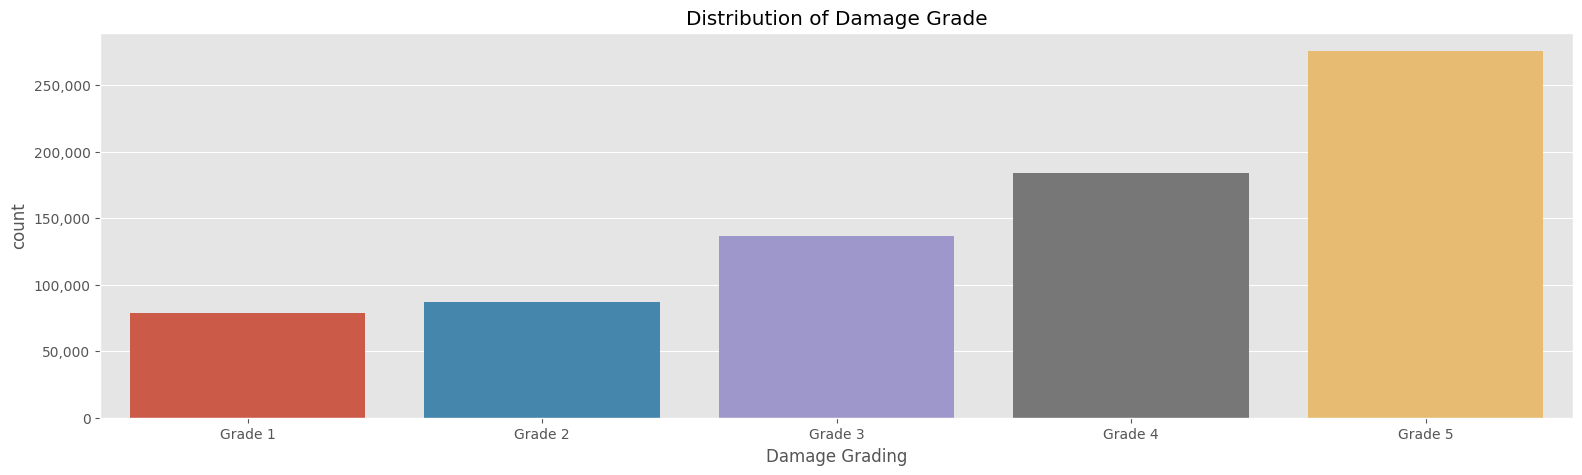

In [31]:
# Distribution of Damage Grade
plt.figure(figsize=(19,5))
ax = sns.countplot(x='damage_grade', data=df, order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'])
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title("Distribution of Damage Grade")
plt.xlabel("Damage Grading")
plt.show()

In [ ]:
# Convert data types to categorical
df = df.astype({'district_id': int, 
                'vdcmun_id'  : int, 
                'ward_id'    : int})

df = df.astype({'district_id': 'object', 
                'vdcmun_id'  : 'object', 
                'ward_id'    : 'object'})

In [42]:
df.select_dtypes(include='O').dtypes

district_id                    object
vdcmun_id                      object
ward_id                        object
land_surface_condition         object
foundation_type                object
roof_type                      object
ground_floor_type              object
other_floor_type               object
position                       object
plan_configuration             object
condition_post_eq              object
damage_grade                   object
technical_solution_proposed    object
dtype: object

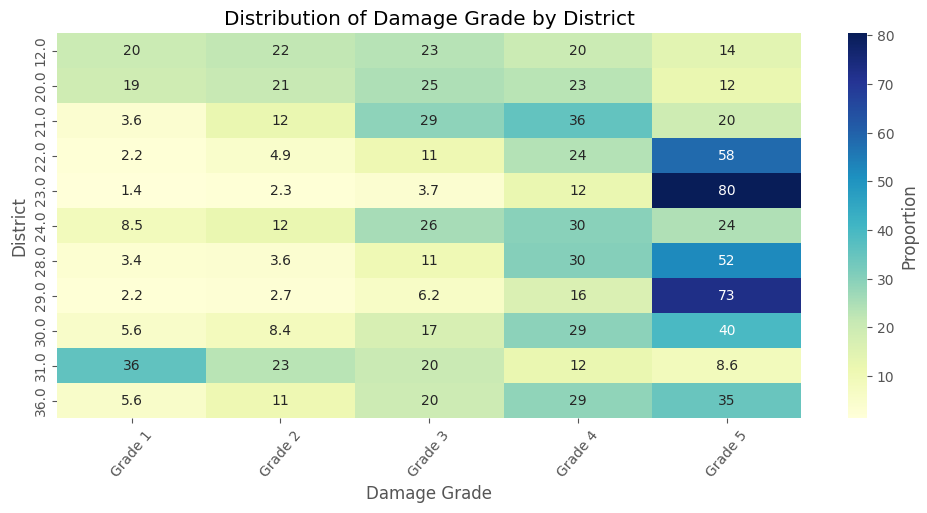

In [43]:
# Calculate counts
df_temp = df.groupby(['district_id', 'damage_grade']).size().reset_index(name='count')

# Calculate Proportion of grade
#  The transform function is used to apply the calculation to each group separately.
df_temp['proportion'] = df_temp.groupby('district_id')['count'].transform(lambda x: 100 * x / x.sum())

# Pivot table
df_temp = pd.pivot_table(df_temp, values='proportion', index='district_id', columns='damage_grade')

# Plot char
plt.figure(figsize=(12, 5))
ax = sns.heatmap(data=df_temp, annot=True, cmap='YlGnBu')
plt.xticks(rotation=50)

# Add colorbar for legend
cbar = ax.collections[0].colorbar
cbar.set_label("Proportion")

plt.title("Distribution of Damage Grade by District")
plt.xlabel("Damage Grade")
plt.ylabel("District")
plt.show()


In [49]:
df.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'lost_floors', 'lost_height', 'land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position', 'plan_configuration', 'condition_post_eq', 'damage_grade',
       'technical_solution_proposed'],
      dtype='object')

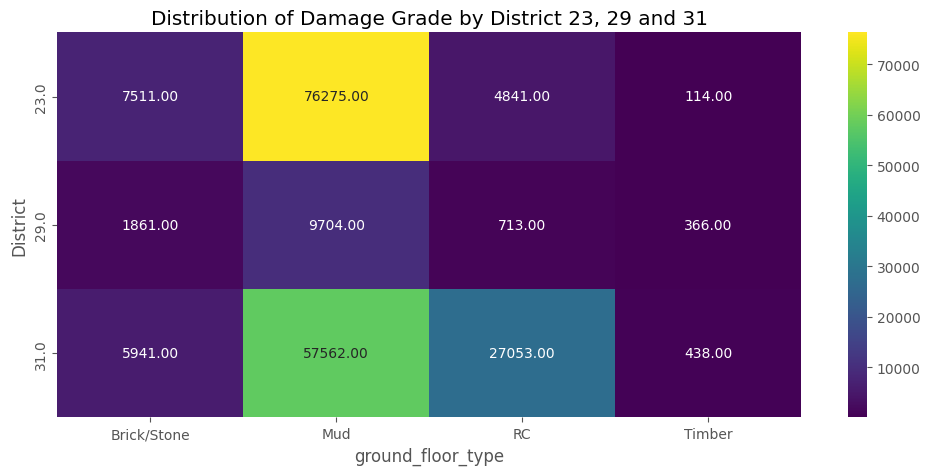

2023-11-03 14:27:11,924 - INFO     - Executing shutdown due to inactivity...
2023-11-03 14:27:20,064 - INFO     - Executing shutdown...
2023-11-03 14:27:20,064 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [82]:
selected_districts = [23, 29, 31]

# Filter the DataFrame
df_selected_districts = df[df['district_id'].isin(selected_districts)]

# Group by the selected columns and calculate counts
df_temp = df_selected_districts.groupby(['district_id', 'ground_floor_type']).size().reset_index(name='count')

# Pivot the DataFrame to ensure numeric values
df_temp_pivot = df_temp.pivot_table(index='district_id', columns='ground_floor_type', values='count', fill_value=0)

# Plot chart using Seaborn
plt.figure(figsize=(12, 5))
ax = sns.heatmap(data=df_temp_pivot, annot=True, cmap="viridis", fmt=".2f")
plt.title("Distribution of Damage Grade by District 23, 29 and 31")
plt.xlabel("ground_floor_type")
plt.ylabel("District")
plt.show()


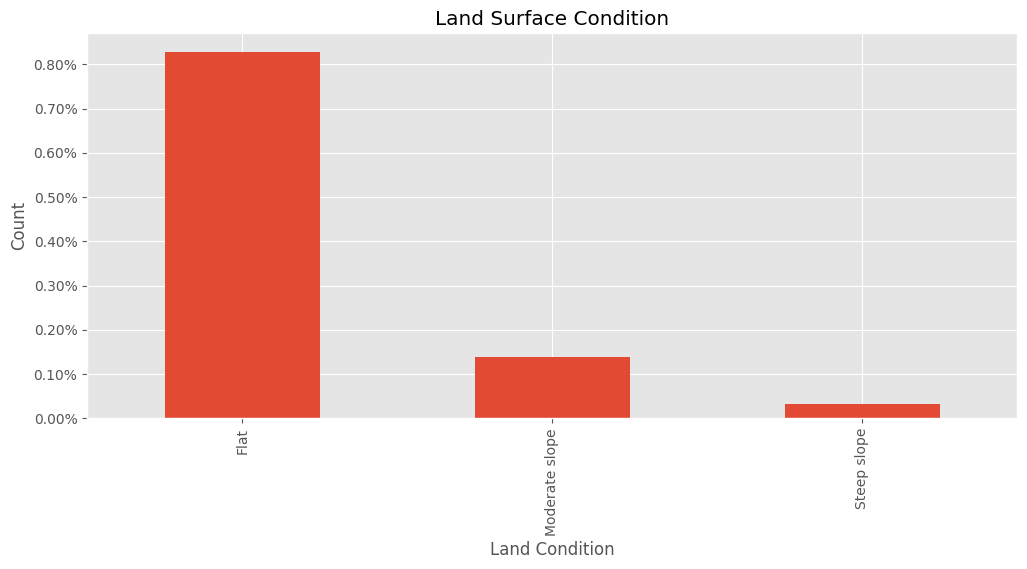

In [44]:
plt.figure(figsize=(12,5))
ax = df.land_surface_condition.value_counts(normalize = True).plot(kind = "bar")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Land Surface Condition")
plt.ylabel("Count")
plt.xlabel("Land Condition")
plt.show()

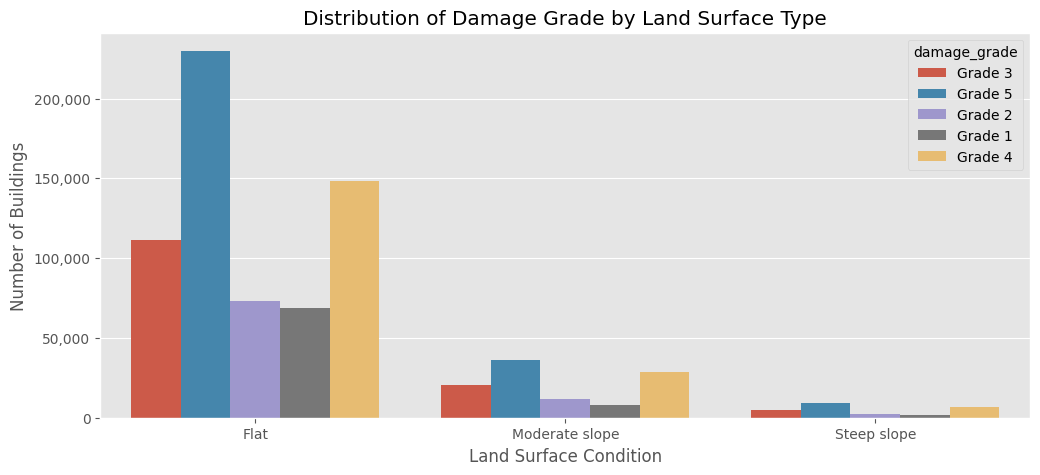

In [51]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(df, x='land_surface_condition', hue='damage_grade')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title("Distribution of Damage Grade by Land Surface Type")
plt.xlabel("Land Surface Condition")
plt.ylabel("Number of Buildings")
plt.show()

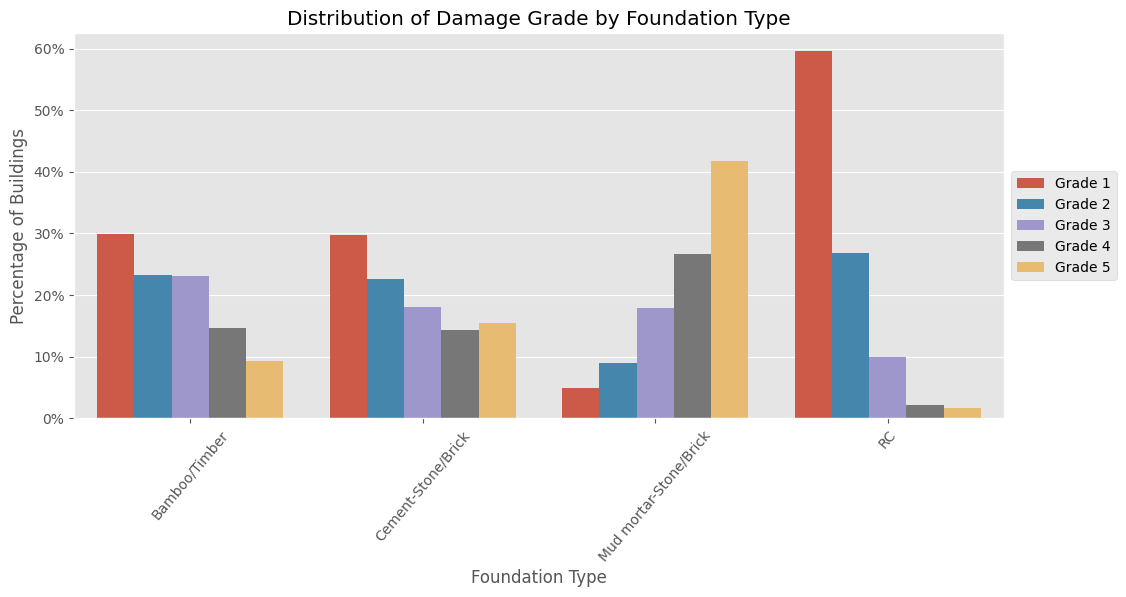

In [54]:
# Calculate counts
df_temp = df.groupby(['foundation_type', 'damage_grade']).size().reset_index(name='count')

# Calculate Proportion of grade
df_temp['proportion'] = df_temp.groupby('foundation_type')['count'].transform(lambda x: 100 * x / x.sum())

# Plot chart
plt.figure(figsize=(12, 5))
ax = sns.barplot(data=df_temp, x='foundation_type', y='proportion', hue='damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Foundation Type")
plt.xlabel("Foundation Type")
plt.ylabel("Percentage of Buildings")
plt.show()

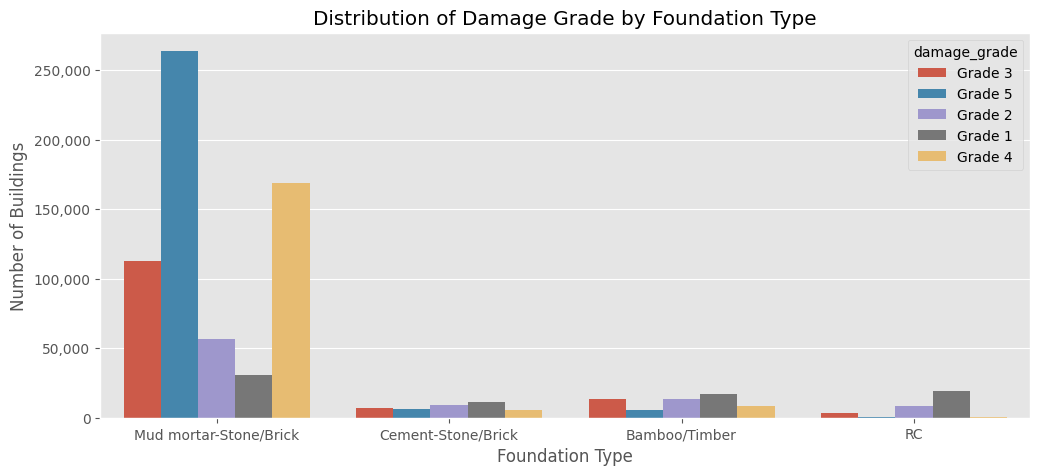

In [33]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(df, x='foundation_type', hue='damage_grade')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title("Distribution of Damage Grade by Foundation Type")
plt.xlabel("Foundation Type")
plt.ylabel("Number of Buildings")
plt.show()

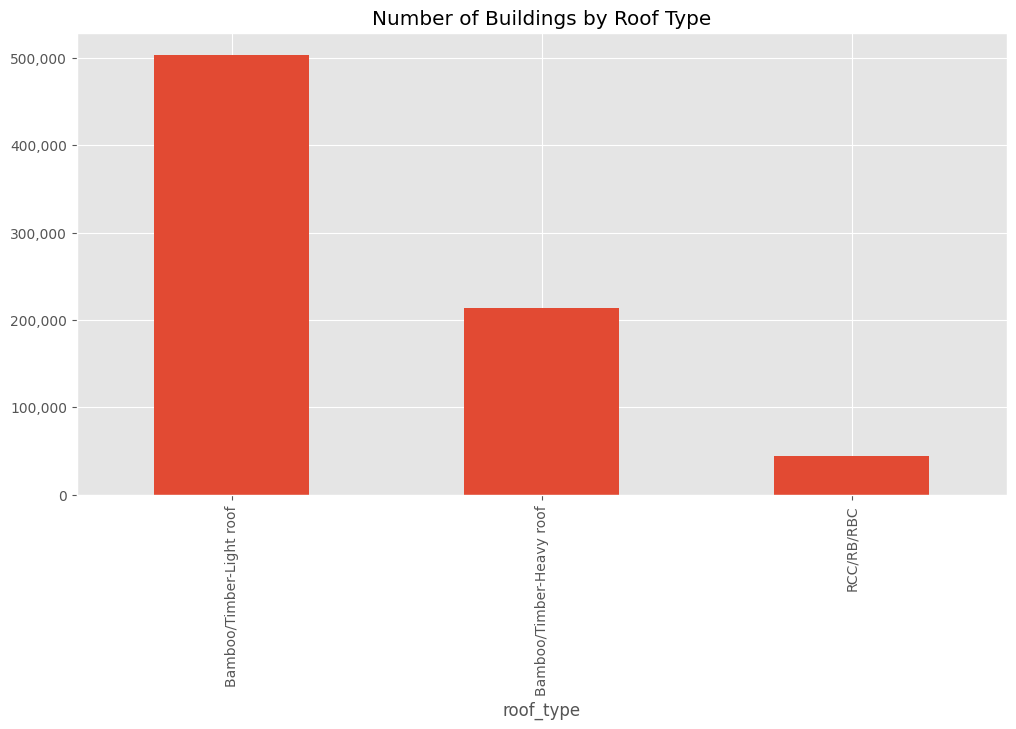

In [23]:
plt.figure(figsize = (12,6))
ax = df.roof_type.value_counts().plot(kind = "bar")
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title("Number of Buildings by Roof Type")
plt.show()

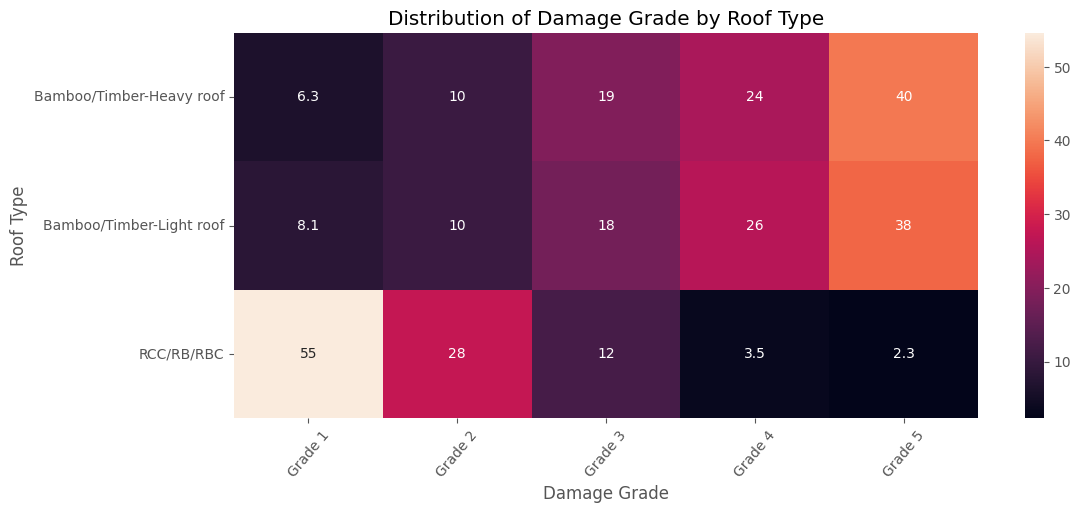

In [59]:
# Calculate counts
df_temp = df.groupby(['roof_type', 'damage_grade']).size().reset_index(name='count')

# Calculate Proportion of grade
df_temp['proportion'] = df_temp.groupby('roof_type')['count'].transform(lambda x: 100 * x / x.sum())

# Pivot table
df_temp = pd.pivot_table(df_temp.reset_index(), values='proportion', index=['roof_type'], columns='damage_grade')

# Plot char
plt.figure(figsize=(12, 5))
ax = sns.heatmap(data=df_temp, annot=True)
plt.xticks(rotation=50)
plt.title("Distribution of Damage Grade by Roof Type")
plt.xlabel("Damage Grade")
plt.ylabel("Roof Type")
plt.show()

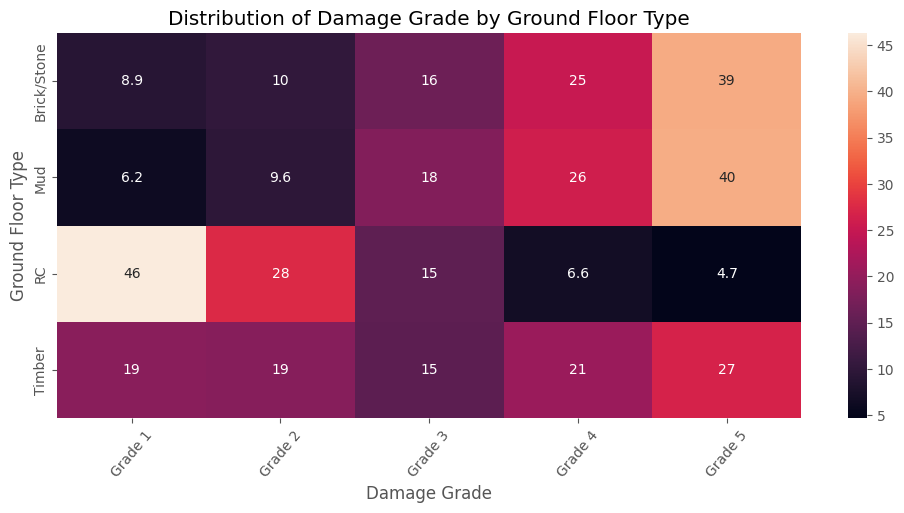

In [61]:
# Calculate counts
df_temp = df.groupby(['ground_floor_type', 'damage_grade']).size().reset_index(name='count')

# Calculate Proportion of grade
df_temp['proportion'] = df_temp.groupby('ground_floor_type')['count'].transform(lambda x: 100 * x / x.sum())

# Pivot table
df_temp = pd.pivot_table(df_temp.reset_index(), values='proportion', index=['ground_floor_type'], columns='damage_grade')

# Plot char
plt.figure(figsize=(12, 5))
ax = sns.heatmap(data=df_temp, annot=True)
plt.xticks(rotation=50)
plt.title("Distribution of Damage Grade by Ground Floor Type")
plt.xlabel("Damage Grade")
plt.ylabel("Ground Floor Type")
plt.show()

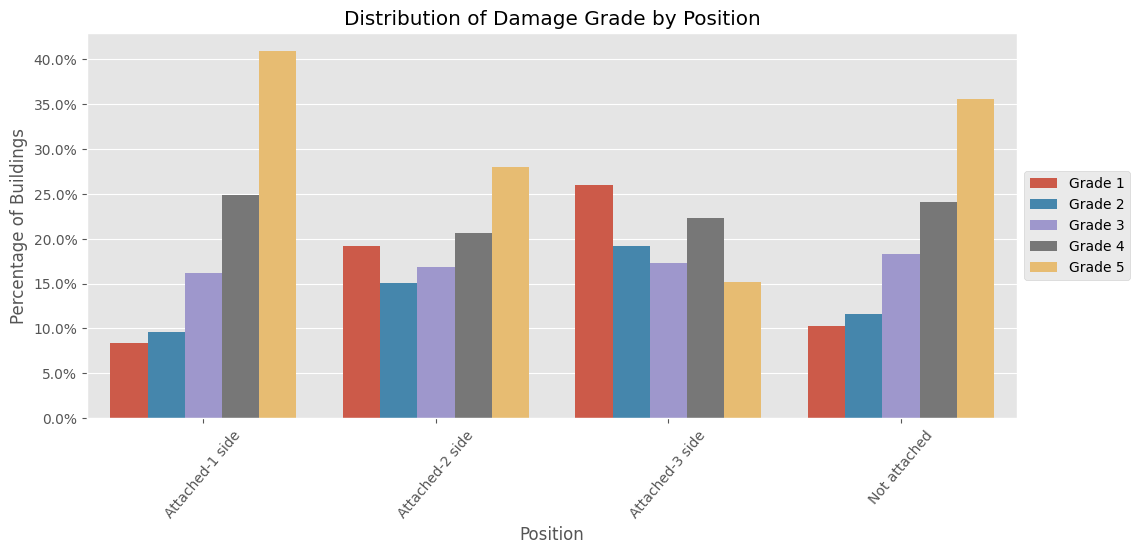

In [4]:
# Calculate counts
df_temp = df.groupby(['position','damage_grade']).size().reset_index(name='count')

# Calculate Proportion of grade
df_temp['count_percentage'] = df_temp.groupby('position')['count'].transform(lambda x: 100 * x / x.sum())

# Plot chart
plt.figure(figsize=(12,5))
ax = sns.barplot(data=df_temp, 
                 x='position', 
                 y='count_percentage', 
                 hue='damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Position")
plt.xlabel("Position")
plt.ylabel("Percentage of Buildings")
plt.show()

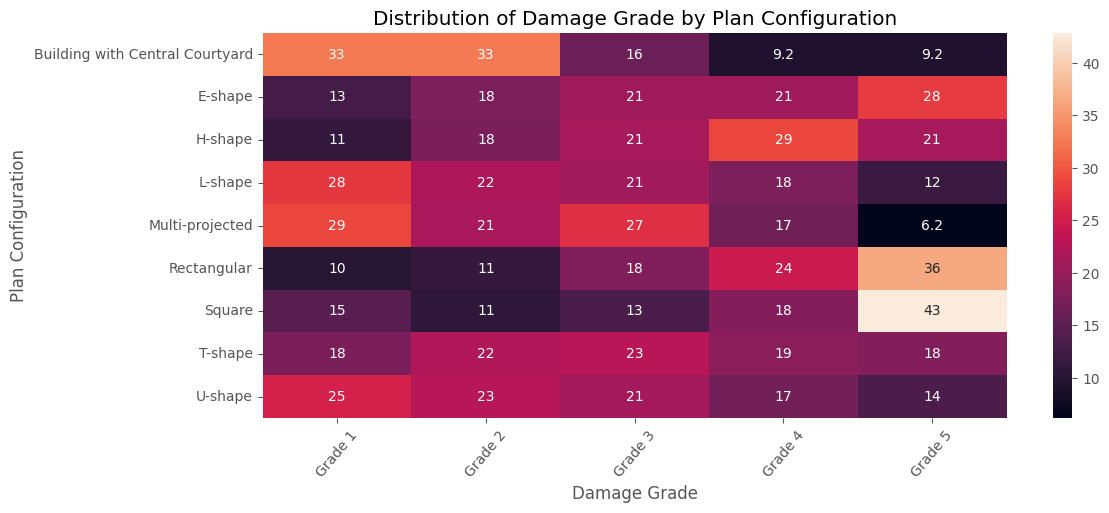

In [8]:
# Calculate counts
df_temp = df.groupby(['plan_configuration', 'damage_grade']).size().reset_index(name='count')

# Pivot table
df_temp = pd.pivot_table(df_temp, values='count', index=['plan_configuration'], columns='damage_grade', fill_value=0)

# Normalize by row
df_temp = df_temp.div(df_temp.sum(axis=1), axis=0) * 100

# Plot chart
plt.figure(figsize=(12, 5))
ax = sns.heatmap(data=df_temp, annot=True)
plt.xticks(rotation=50)
plt.title("Distribution of Damage Grade by Plan Configuration")
plt.xlabel("Damage Grade")
plt.ylabel("Plan Configuration")
plt.show()

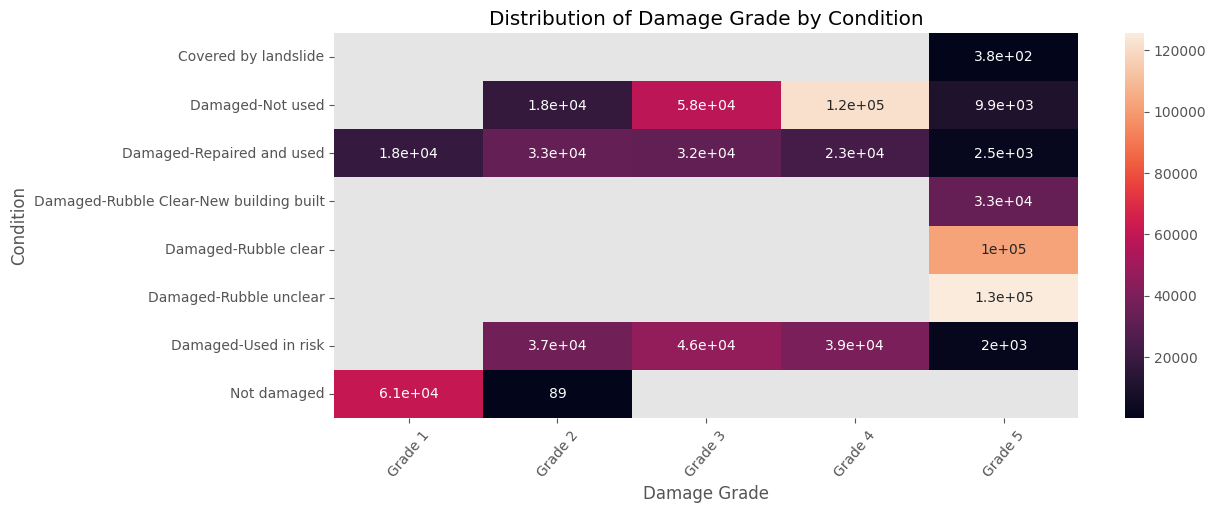

2023-11-02 16:22:17,398 - INFO     - Executing shutdown due to inactivity...
2023-11-02 16:22:25,715 - INFO     - Executing shutdown...
2023-11-02 16:22:25,715 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [38]:
# Calculate counts
df_temp = df.groupby(['condition_post_eq','damage_grade']).size().reset_index(name='count')

# Pivot table
df_temp = pd.pivot_table(df_temp, values='count', index=['condition_post_eq'], columns='damage_grade')

# Plot char
plt.figure(figsize=(12,5))
ax = sns.heatmap(data = df_temp, annot = True )
plt.xticks(rotation = 50)
plt.title("Distribution of Damage Grade by Condition")
plt.xlabel("Damage Grade")
plt.ylabel("Condition")
plt.show()

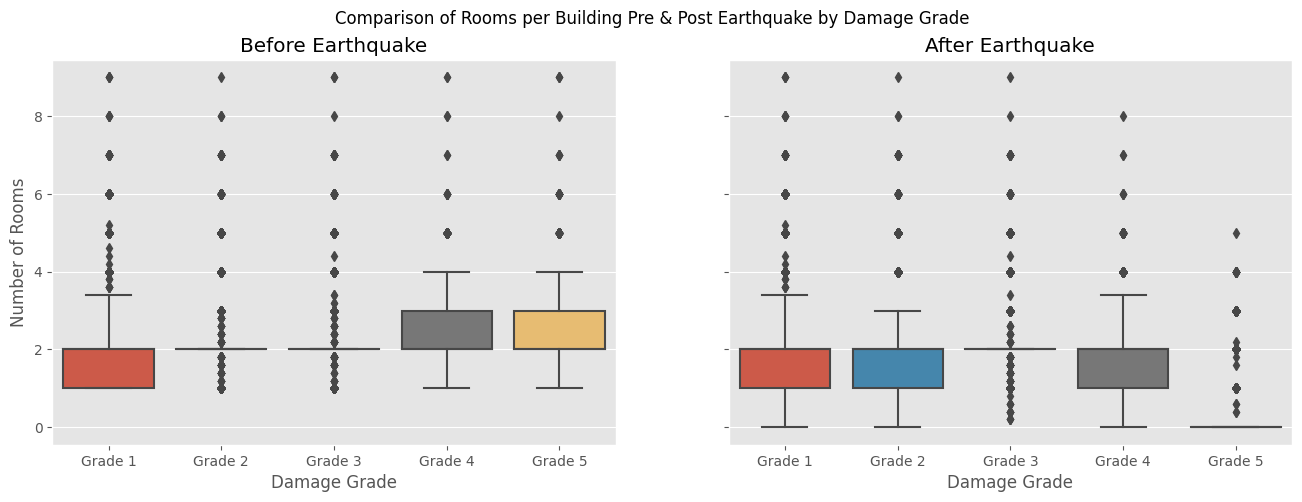

In [14]:
fig, ax = plt.subplots(1,2,figsize = (16,5), sharey='row')
fig.suptitle("Comparison of Rooms per Building Pre & Post Earthquake by Damage Grade")
ax[0].set_title("Before Earthquake")
ax[1].set_title("After Earthquake")
sns.boxplot(data = df, 
            x = "damage_grade", 
            y = "count_floors_pre_eq", 
            order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'],
            ax = ax[0])
sns.boxplot(data = df, 
            x = "damage_grade", 
            y = "count_floors_post_eq", 
            order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'],
            ax = ax[1])
plt.setp(ax[:], xlabel='Damage Grade')
plt.setp(ax[0], ylabel='Number of Rooms')
plt.setp(ax[1], ylabel=None)
plt.show()

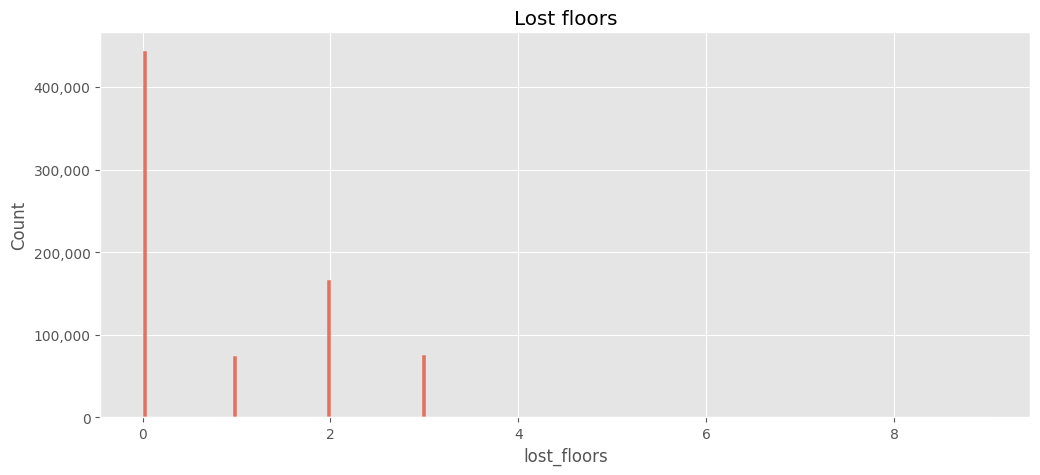

In [24]:
plt.figure(figsize=(12, 5))
ax = sns.histplot(df['lost_floors'])
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title("Lost floors")
plt.show()

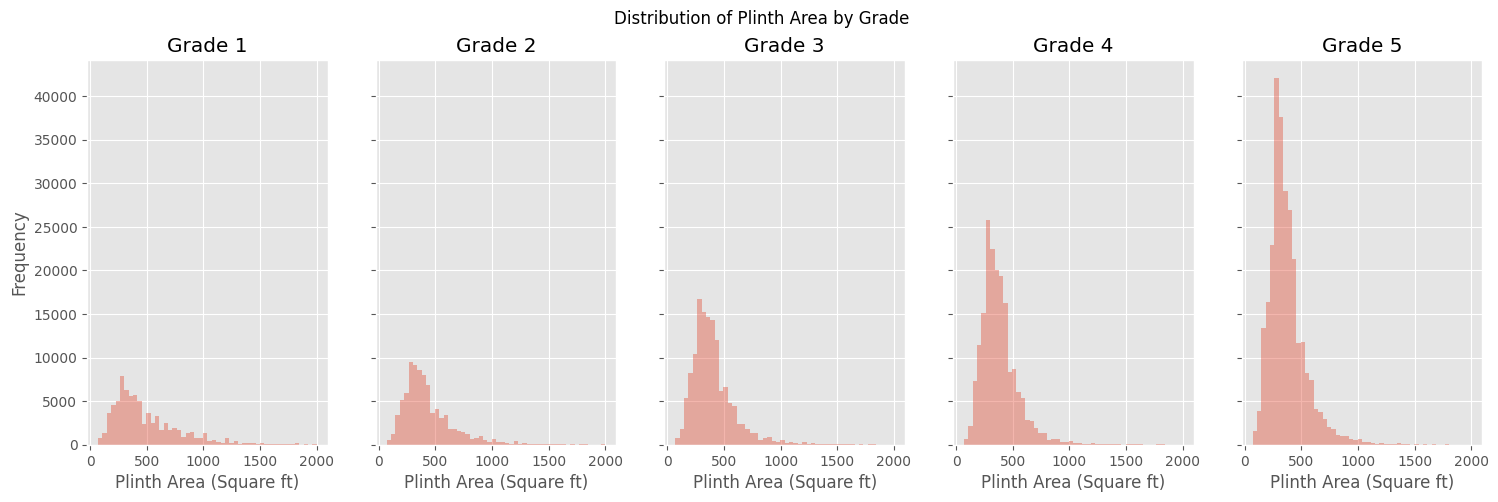

In [25]:
# List of grades
v_grades = ['Grade ' + str(x) for x in range(1,6)]

# Plot structure
fig, ax = plt.subplots(1, 5, figsize=(18,5), sharey="row", sharex="row")
fig.suptitle("Distribution of Plinth Area by Grade")

# Build plot
count = 0
for grade in v_grades:
    df_temp = df[(df.damage_grade == grade) & (df.plinth_area_sq_ft <= 2000)] # filter for grade
    ax[count].set_title(grade)
    sns.distplot(a = df_temp['plinth_area_sq_ft'], label = grade, kde=False, ax=ax[count])
    del df_temp
    count += 1
    
# Plot Aesthetics
plt.setp(ax[:], xlabel='Plinth Area (Square ft)')
plt.setp(ax[0], ylabel='Frequency')
plt.show()

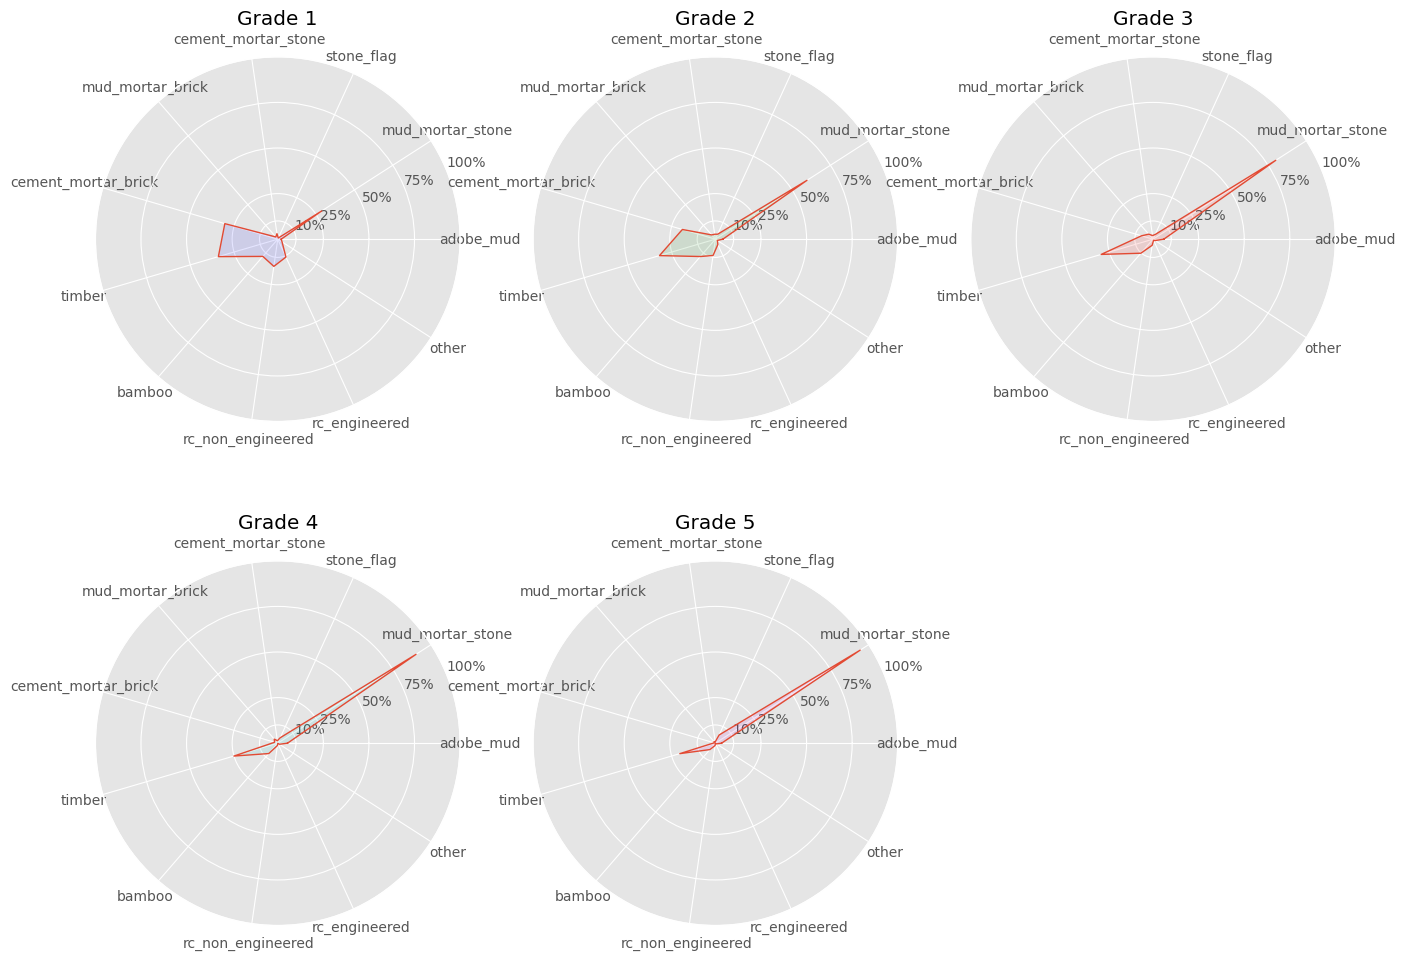

In [28]:
# list of binary columns
v_cols = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
          'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
          'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 
          'has_superstructure_timber', 'has_superstructure_bamboo', 
          'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 
          'has_superstructure_other']

# New Names of Binary Cols
v_names = {'has_superstructure_adobe_mud':'adobe_mud', 
           'has_superstructure_mud_mortar_stone':'mud_mortar_stone',
          'has_superstructure_stone_flag':'stone_flag', 
           'has_superstructure_cement_mortar_stone':'cement_mortar_stone',
          'has_superstructure_mud_mortar_brick':'mud_mortar_brick', 
           'has_superstructure_cement_mortar_brick':'cement_mortar_brick', 
          'has_superstructure_timber':'timber', 
           'has_superstructure_bamboo':'bamboo', 
          'has_superstructure_rc_non_engineered':'rc_non_engineered', 
           'has_superstructure_rc_engineered':'rc_engineered', 
          'has_superstructure_other':'other'}

# Summarise and rename columns
df_temp = df.groupby('damage_grade')[v_cols].agg('mean').reset_index()
df_temp.rename(columns=v_names, inplace = True)

# Lists to use
v_grades = ['Grade ' + str(x) for x in range(1,6)]
v_colour = ['b', 'g', 'r', 'c', 'm']

# number of variables
v_categories = list(df_temp)[1:]
v_N = len(v_categories)

# Angles
v_angles = [n / float(v_N) * 2 * pi for n in range(v_N)]
v_angles += v_angles[:1]

# Initialise the plot
fig, ax = plt.subplots(2,3, figsize = (16,12), subplot_kw=dict(polar=True))

# Format axis
plt.setp(ax, # X
         xticks = v_angles[:-1], 
         xticklabels = v_categories,
         yticks = [0.10,0.25,0.50,0.75,1.0],
         yticklabels = ["10%","25%","50%","75%","100%"],
         ylim = (0,1))

# Populate plot in a loop
count, row, col = 0, 0, 0
for grade in v_grades:   
    values = df_temp.loc[count].drop('damage_grade').values.flatten().tolist()
    values += values[:1]
    ax[row, col].plot(v_angles, values, linewidth=1, linestyle='solid', label=grade)
    ax[row, col].fill(v_angles, values, v_colour[count], alpha=0.1)
    ax[row, col].set_title(grade)

    # Increment counters
    if count >= 2: # Ensure reference correct row
        row = 1
    
    if col < 2: # Ensure reference correct col
        col += 1
    else:
        col = 0
    
    count += 1 # increase count var

# Drop 6th subplot
fig.delaxes(ax[1,2])

<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Using dtale
</p>
</div>

In [39]:
dtale.show(df)

<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Conclusion
</p>
</div>

* Number of buildings is approximately increasing with damage grade.
* District 23 & 29 has a very high number of grade 5 damaged buildings as most of them are mud.
* Most of grade 5 have Flat surface condition.
* Steep slope surface condition has the least number of damages.
* Mud mortar-stone/brick has the most number of damageas especially for grade 5.
* RCC roof type is strongly related to grade1.
* Most of grade 5 isn't attached to 3 sides. but grade 1 is.
* It turns out that most of plan configuration rectangle and square are grade 5 and multiprojected is the least.
* According to condition, grade 1 is either not damaged or repaired and used, grade 5 rubble unclear.
* In grade 2 and 5, floors loss is highly noticed.